In [2]:
import deepchem as dc
import pandas as pd
import numpy as np
import rdkit

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!


Error: Unable to import pysam. Please make sure it is installed.
Error: Unable to import pysam. Please make sure it is installed.
Error: Unable to import pysam. Please make sure it is installed.

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\wanne\AppData\Local\Programs\Python\Python310\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (c:\Users\wanne\AppData\Local\Programs\Python\Python310\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [3]:
from rdkit import Chem
smiles = ['[*]CC([*])C', '[*]CCOC(=O)NCCOCCOCCNC(=O)O[*]', '[*]CCC(F)(F)C([*])(F)F']
molecules = []
for mol in smiles:
    RDkitObj = Chem.MolFromSmiles(mol)
    molecules.append(RDkitObj)



In [4]:
from rdkit.Chem import Descriptors

for mol in molecules:
    mol_weight = Descriptors.MolWt(mol)
    print(mol_weight)

42.080999999999996
262.26199999999994
128.068


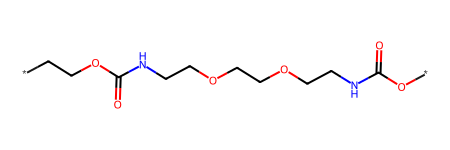

In [5]:
molecules[1]

In [6]:
from rdkit.Chem import Descriptors
print(len(Descriptors._descList))

210


In [7]:
def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule
    
        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for name,function in Descriptors._descList:
        # some of the descriptor fucntions can throw errors if they fail, catch those here:
        try:
            val = function(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[name] = val
    return res

In [13]:
featurizer = dc.feat.RDKitDescriptors(use_bcut2d = False)
features = featurizer.featurize(molecules)
len(features[0])

202

In [14]:
descriptors = getMolDescriptors(molecules[0]) #[*]CC([*])C
len(descriptors)
descriptors

{'MaxAbsEStateIndex': 2.3958333333333335,
 'MaxEStateIndex': 2.3958333333333335,
 'MinAbsEStateIndex': 0.75,
 'MinEStateIndex': 0.75,
 'qed': 0.4147201749014908,
 'SPS': 25.666666666666668,
 'MolWt': 42.080999999999996,
 'HeavyAtomMolWt': 36.033,
 'ExactMolWt': 42.046950192,
 'NumValenceElectrons': 18,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': nan,
 'MinPartialCharge': nan,
 'MaxAbsPartialCharge': nan,
 'MinAbsPartialCharge': nan,
 'FpDensityMorgan1': 3.0,
 'FpDensityMorgan2': 3.3333333333333335,
 'FpDensityMorgan3': 3.3333333333333335,
 'BCUT2D_MWHI': nan,
 'BCUT2D_MWLOW': nan,
 'BCUT2D_CHGHI': nan,
 'BCUT2D_CHGLO': nan,
 'BCUT2D_LOGPHI': nan,
 'BCUT2D_LOGPLOW': nan,
 'BCUT2D_MRHI': nan,
 'BCUT2D_MRLOW': nan,
 'AvgIpc': 1.3787834934861756,
 'BalabanJ': 2.5395388613593908,
 'BertzCT': 18.854752972273346,
 'Chi0': 4.284457050376173,
 'Chi0n': 2.284457050376173,
 'Chi0v': 2.284457050376173,
 'Chi1': 2.270055610029662,
 'Chi1n': 0.9855985596534889,
 'Chi1v': 0.9855985596534889,
 'Ch